Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering

### Using ``scipy.stats.rv_continuous`` to analize or simulate RV samples   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [77]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


### 1. Predefined random variables

There are many (_dozens of_) predefined continuous RV distribuitions in ``scipy.stats``. 
For instance, the following are the most useful in our context:

1. ``st.uniform(a, b)``: uniform distribuition between $a$ and $b$ limits.
2. ``st.norm(μ, σ)``: normal (Gaussian) distribution with mean $\mu$ and standard 
deviation $\sigma$.
3. ``st.weibull_min(β, L, S)``:  Weibull assimptotic distribution of minima with 
shape $\beta$, location parameter $L$ and scale parameter $S$.

Below is an example how to define RV's with these distributions and plot the
respective probability densities:

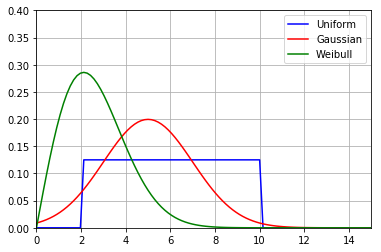

In [78]:
X  = np.linspace(0,15,100)

f1  = plt.figure(1, figsize=(6,4))

U   = st.uniform(2,8)           # define uniform between 2 and 8
f1a = plt.plot(X, U.pdf(X),'b')

Z   = st.norm(5,2)              # define Gaussian with mean 5 and deviation 2
f1b = plt.plot(X, Z.pdf(X),'r')

W   = st.weibull_min(2,0,3)     # define Weibull with shape 2, loc 0 and scale 3
f1c = plt.plot(X, W.pdf(X),'g')

plt.legend(('Uniform','Gaussian','Weibull'))
plt.axis([0, 15, 0, 0.4])
plt.grid(True)


### 2. Calculation of statistical properties

The estimation of statistical moments are straightforward and can be calculated
in some alternative ways. Below is a method for calculating the most basic properties:

In [3]:
momU = U.stats(moments='mvks')
print('Statistics for defined uniform RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momU[0]))
print('Standard deviation is:     {0:6.3f}'.format(momU[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momU[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momU[3]),'\n')

momZ = Z.stats(moments='mvks')
print('Statistics for defined normal  RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momZ[0]))
print('Standard deviation is:     {0:6.3f}'.format(momZ[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momZ[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momZ[3]),'\n')

momW = W.stats(moments='mvks')
print('Statistics for defined Weibull RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momW[0]))
print('Standard deviation is:     {0:6.3f}'.format(momW[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momW[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momW[3]))

Statistics for defined uniform RV
---------------------------------
Mean value is:              6.000
Standard deviation is:      5.333
Kurtosis coefficient is:    0.000
Skewness coefficient is:   -1.200 

Statistics for defined normal  RV
---------------------------------
Mean value is:              5.000
Standard deviation is:      4.000
Kurtosis coefficient is:    0.000
Skewness coefficient is:    0.000 

Statistics for defined Weibull RV
---------------------------------
Mean value is:              2.659
Standard deviation is:      1.931
Kurtosis coefficient is:    0.631
Skewness coefficient is:    0.245


### 3. Custom definition of random variables

The module also allow us to define our own custom RV distributions, by inheriting 
from  class ``rv_continuous`` and programming either the probability density function 
(method ``_pdf(x)``) or the cumulative distribution function (method ``_cdf(x)``).
It is important, however, that these functions are defined to be normalized (integral
from _pdf_ must be one).

Below is an example on how to implement this new distribution:

In [79]:
class myRV(st.rv_continuous):

    def __init__(self, LB, UB):
        st.rv_continuous.__init__(self, a=LB, b=UB)
    
    def _pdf(self, x):
        return 2*(x - self.a)/(self.b - self.a)**2
        
    def _fitstart(self, data):
        return data.min(), data.max()


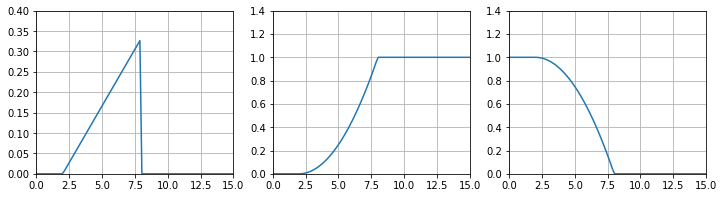

In [93]:
RV  =  myRV(2, 8)
f4  =  plt.figure(4, figsize=(12,3))

plt.subplot(1,3,1)
f4a =  plt.plot(X, RV.pdf(X))   # probability density
plt.axis([0, 15, 0, 0.4])
plt.grid(True)

plt.subplot(1,3,2)
f4b =  plt.plot(X, RV.cdf(X))   # cumulative distribution
plt.axis([0, 15, 0, 1.4])
plt.grid(True)

plt.subplot(1,3,3)
f4b =  plt.plot(X, RV.sf(X))    # survival
plt.axis([0, 15, 0, 1.4])
plt.grid(True)

In [57]:
momRV = RV.stats(moments='mvks')
print('Statistics for custom defined  RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momRV[0]))
print('Standard deviation is:     {0:6.3f}'.format(momRV[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momRV[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momRV[3]))


Statistics for custom defined  RV
---------------------------------
Mean value is:              6.000
Standard deviation is:      2.000
Kurtosis coefficient is:   -0.566
Skewness coefficient is:   -0.600


### 4. Simulation of random variables

The following method can be applied equally to predefined RV distributions as to our 
custom distributions.


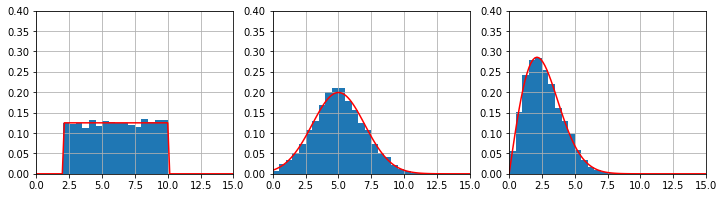

In [84]:
Ui = U.rvs(5000)
Zi = Z.rvs(5000)
Wi = W.rvs(5000)

plt.figure(5, figsize=(12,3))

plt.subplot(1,3,1)
f5a = plt.hist(Ui, bins=30, range=(0,15), density=True)
f5b = plt.plot(X, U.pdf(X), 'r')
plt.axis([0, 15, 0, 0.4])
plt.grid(True)

plt.subplot(1,3,2)
f6a = plt.hist(Zi, bins=30, range=(0,15), density=True)
f6b = plt.plot(X, Z.pdf(X), 'r')
plt.axis([0, 15, 0, 0.4])
plt.grid(True)

plt.subplot(1,3,3)
f7a = plt.hist(Wi, bins=30, range=(0,15), density=True)
f7b = plt.plot(X, W.pdf(X), 'r')
plt.axis([0, 15, 0, 0.4])
plt.grid(True)

The same can be accomplished also for custom distributions:

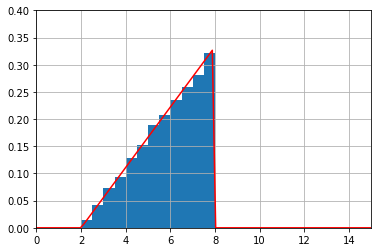

In [70]:
RVi = RV.rvs(size=5000)  # size is explicit to avoid ambiguity

plt.figure(6, figsize=(6,4))

f6a = plt.hist(RVi, bins=30, range=(0,15), density=True)
f6b = plt.plot(X, RV.pdf(X), 'r')
plt.axis([0, 15, 0, 0.4])
plt.grid(True)

### 5. Fitting probability distributions to data

In [82]:
parU = st.uniform.fit(Ui)
print('Uniform distribution')
print('--------------------')
print('Lower bound:        {0:6.3f}'.format(parU[0]))
print('Upper bound:        {0:6.3f}'.format(parU[1]),'\n')

parZ = st.norm.fit(Zi)
print('Normal  distribution')
print('--------------------')
print('Mean value:         {0:6.3f}'.format(parZ[0]))
print('Standard deviation: {0:6.3f}'.format(parZ[1]),'\n')

parW = st.weibull_min.fit(Wi)
print('Weibull distribution')
print('--------------------')
print('Shape parameter:    {0:6.3f}'.format(parW[0]))
print('Location parameter: {0:6.3f}'.format(parW[1]))
print('Scale parameter:    {0:6.3f}'.format(parW[2]))

Uniform distribution
--------------------
Lower bound:         2.001
Upper bound:         7.996 

Normal  distribution
--------------------
Mean value:          5.010
Standard deviation:  2.029 

Weibull distribution
--------------------
Shape parameter:     2.013
Location parameter: -0.003
Scale parameter:     3.006


The attempts to fit a custom distribution to its own simulation is not working so far...

In [95]:
parRV = RV.fit(RVi)
print('Custom distribution')
print('-------------------')
print('Lower bound: {0:6.3f}'.format(parRV[0]))
print('Upper bound: {0:6.3f}'.format(parRV[1]))


Custom distribution
-------------------
Lower bound: -0.004
Upper bound:  1.000
